> # CNN - 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D

In [2]:
from keras.datasets import mnist

In [ ]:
# fashion_mnist.load_data?

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape((x_train.shape[0],28,28,1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0],28,28,1)).astype('float32')

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [7]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [11]:
history = model.fit(x_train,y_train,batch_size=64,epochs=2)

Epoch 1/2
938/938 [==============================] - 152s 159ms/step - loss: 0.7870 - accuracy: 0.7536
Epoch 2/2
938/938 [==============================] - 132s 141ms/step - loss: 0.3695 - accuracy: 0.8890


In [12]:
pred_img = model.predict(x_test[0].reshape(1,28,28,1))

1/1 [==============================] - 0s 413ms/step


In [13]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 8s 20ms/step - loss: 0.1914 - accuracy: 0.9450


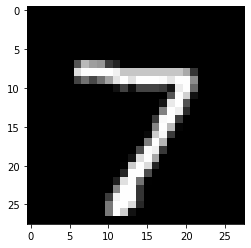

In [14]:
plt.imshow(x_test[0],cmap='gray')

In [15]:
pred_img.argmax()

7

> # CNN - 2

In [16]:
import keras
from keras.datasets import cifar10

In [17]:
cifar10.load_data?

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
# Reshape the data
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

In [21]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [22]:
x_train.max()

255

In [23]:
x_train = x_train/255
x_test = x_test/255

In [24]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [26]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
from keras.layers import BatchNormalization

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [29]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [30]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

In [31]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

This model has 3 convolutional layers with 32, 64, and 128 filters, respectively. After the convolutional layers, there are 2 fully connected layers with 512 and 10 units, respectively. The first fully connected layer is followed by batch normalization and dropout of 0.5.

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [33]:
model.fit(x_train,y_train,batch_size=25,epochs=10)

Epoch 1/10
2000/2000 [==============================] - 176s 82ms/step - loss: 0.2870 - accuracy: 0.4281
Epoch 2/10
2000/2000 [==============================] - 149s 75ms/step - loss: 0.1921 - accuracy: 0.5882
Epoch 3/10
2000/2000 [==============================] - 124s 62ms/step - loss: 0.1720 - accuracy: 0.6358
Epoch 4/10
2000/2000 [==============================] - 123s 61ms/step - loss: 0.1582 - accuracy: 0.6670
Epoch 5/10
2000/2000 [==============================] - 134s 67ms/step - loss: 0.1490 - accuracy: 0.6913
Epoch 6/10
2000/2000 [==============================] - 132s 66ms/step - loss: 0.1418 - accuracy: 0.7103
Epoch 7/10
2000/2000 [==============================] - 135s 68ms/step - loss: 0.1364 - accuracy: 0.7216
Epoch 8/10
2000/2000 [==============================] - 150s 75ms/step - loss: 0.1320 - accuracy: 0.7325
Epoch 9/10
2000/2000 [==============================] - 146s 73ms/step - loss: 0.1278 - accuracy: 0.7415
Epoch 10/10
2000/2000 [==============================] 

In [34]:
_,acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.1167 - accuracy: 0.7578


In [35]:
pred = model.predict(x_test)

313/313 [==============================] - 6s 19ms/step


In [36]:
import numpy as np

y_pred = np.argmax(pred, axis=1)
print(y_pred[:10])

[3 8 8 0 6 6 1 6 3 1]


In [37]:
single_sample = x_test[0]
single_sample = np.expand_dims(single_sample, axis=0)
y_pred_single = model.predict(single_sample)

1/1 [==============================] - 0s 41ms/step


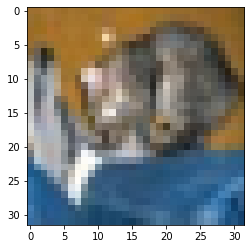

In [38]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])

In [39]:
y_pred_single = np.argmax(y_pred_single, axis=1)
print(y_pred_single)

[3]
